In [5]:
!pip install plotly

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

## Dataset

To illustrate how to visualize tabular data using [Plotly](https://plotly.com/python/getting-started/), we'll be using the [US Births by Year, State, and Education Level](https://www.kaggle.com/datasets/danbraswell/temporary-us-births)

**Introduction**

This dataset provides birth rates and related data across the 50 states and DC from 2016 to 2021. The data was sourced from the Centers for Disease Control and Prevention (CDC) and includes detailed information such as number of births, gender, birth weight, state, and year of the delivery. A particular emphasis is given to detailed information on the mother's educational level. With this dataset, one can, for example, examine trends and patterns in birth rates across different academic groups and geographic locations.

**Important Note**

Each row in the dataset is considered a category defined by the state, birth year, baby's gender, and educational level of the mother. Three quantities are given for each category: number of births, mother's average age, and average baby weight. The CDC is sensitive to potentially disclosing personal information, so any category with less than ten births is suppressed. For this reason, you will find 12 rows missing out of an expected 5,508

Those missing rows all had the mother's educational level listed as "unknown or not stated" and their absence should not significantly impact studies or conclusions made using the dataset.

**Origin**

The data in this dataset was obtained using CDC's WONDER retrieval tool on the [CDC Natality](https://wonder.cdc.gov/natality-current.html) page


**Column Descriptions**
* State ➡️ state name in full (includes District of Columbia)
* State Abbreviation ➡️ 2-character state abbreviation
* Year ➡️ 4-digit year
* Gender ➡️ Gender of baby
* Education Level of Mother ➡️ See table below
* Education Level Code ➡️ See table below
* Number of Births ➡️ Number of births for the category
* Average Age of Mother (years) ➡️ Mother's average age in the category
* Average Birth Weight (g) ➡️ Average birth weight in the category

In [7]:
births = pd.read_csv('https://raw.githubusercontent.com/unissechua/lecture-notebooks/master/us_births_2016_2021.csv')
births.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1927676
M    2018177
Name: Number of Births, dtype: int64


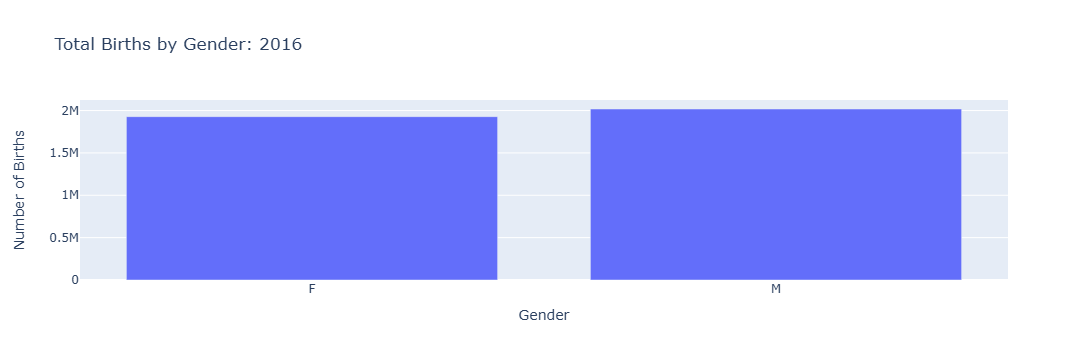

Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1882608
M    1972871
Name: Number of Births, dtype: int64


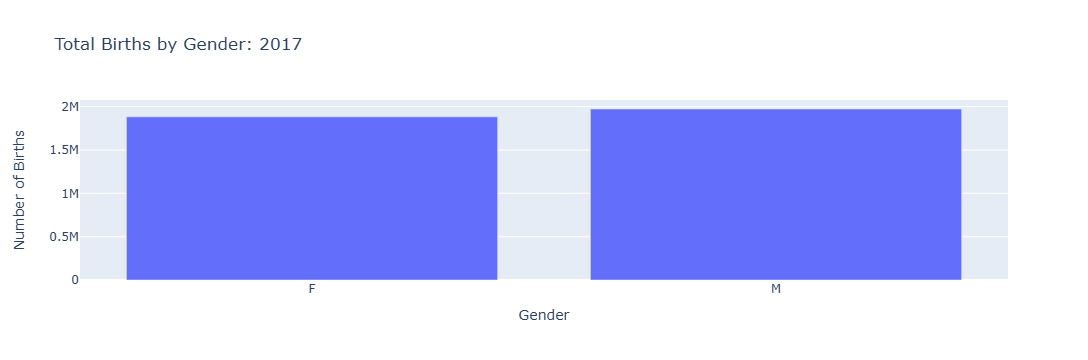

Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1853528
M    1938179
Name: Number of Births, dtype: int64


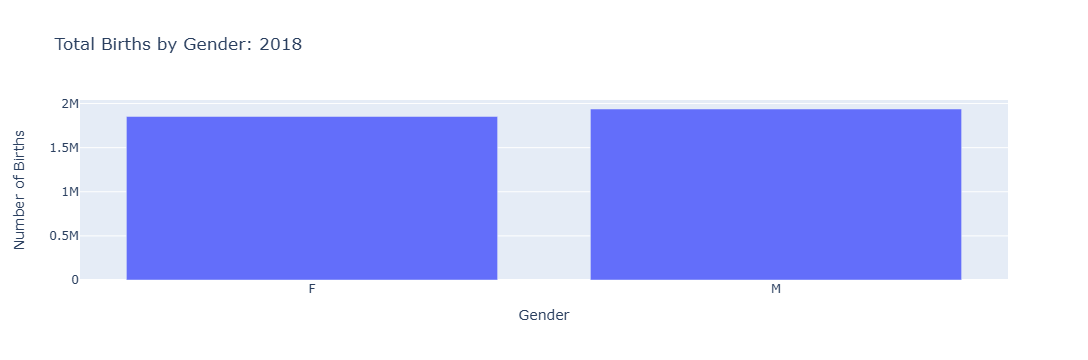

Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1830085
M    1917446
Name: Number of Births, dtype: int64


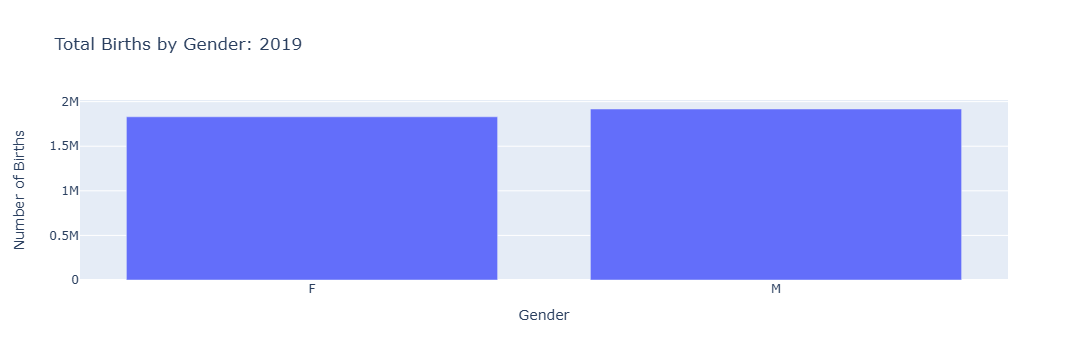

Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1765547
M    1848086
Name: Number of Births, dtype: int64


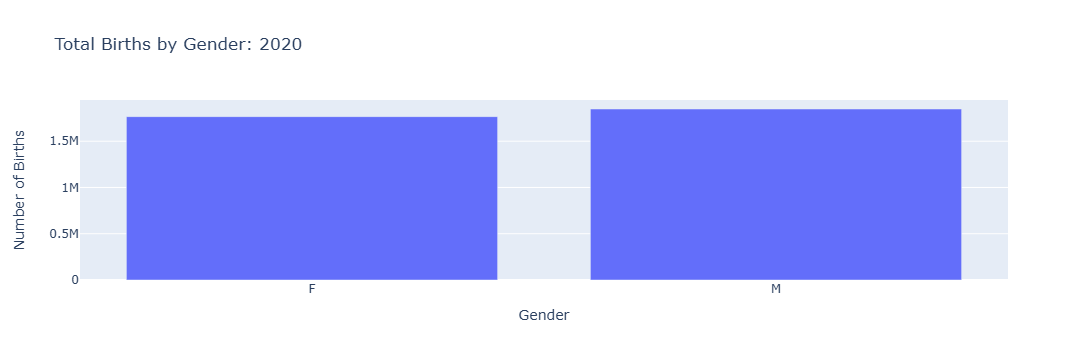

Index(['F', 'M'], dtype='object', name='Gender')
Gender
F    1790870
M    1873407
Name: Number of Births, dtype: int64


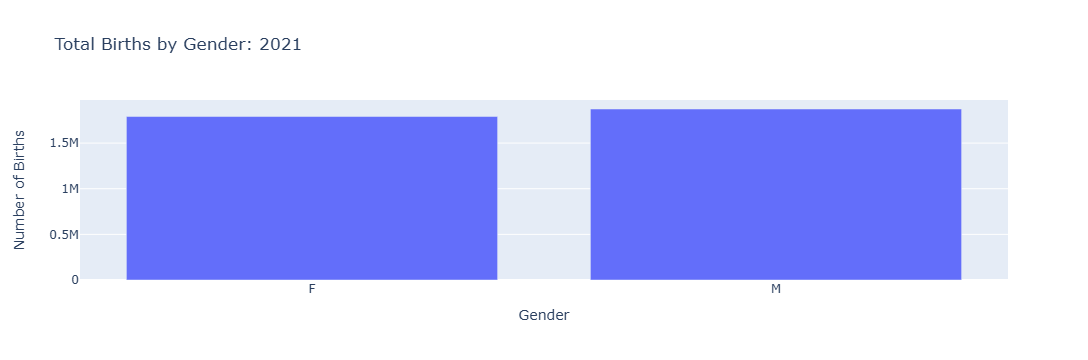

In [9]:
births_years = births['Year'].unique()

for i in births_years:
  birth_by_year = births[births['Year'] == i]

  total_births_by_gender = birth_by_year.groupby('Gender')['Number of Births'].sum()
  print(total_births_by_gender.index)
  print(total_births_by_gender)
  fig_bar_gender = px.bar(total_births_by_gender, y='Number of Births', x=total_births_by_gender.index, title=f"Total Births by Gender: {i}")
  fig_bar_gender.show()

### Exploratory Data Analysis

Upon first laod of the data, we should always perform some EDA to know what kind of data we're dealing with prior to any kind of visualization.

* How many rows and columns does the dataset have?
* What are the data types of each attribute (column)?
* What are the descriptive stats of each column?

In [10]:
# How many rows and columns does the dataset have (1pt)
# your code here
# len(births.columns.unique())
print("Number of rows: " + str(births.shape[0]))
print("Number of columns: " + str(births.shape[1]))

Number of rows: 5496
Number of columns: 9


In [11]:
# What are the data types of each attribute (column)?
# your code here
# births.dtypes
births.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

#### Continuous Data

In [12]:
# What are the descriptive stats of each column?
# your code here
births_cont = births.describe()
births_cont

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,2018.500728,3.026201,4115.443959,29.552274,3250.887627
std,1.707554,4.733406,6687.036797,2.779735,114.456090
min,2016.000000,-9.000000,10.000000,23.100000,2451.900000
25%,2017.000000,2.000000,559.000000,27.500000,3182.200000
50%,2019.000000,4.000000,1692.000000,29.600000,3256.000000
75%,2020.000000,6.000000,5140.000000,31.800000,3330.825000
max,2021.000000,8.000000,59967.000000,35.500000,3585.700000


In [13]:
births_cont.transpose()

,count,mean,std,min,25%,50%,75%,max
Year,5496.0,2018.500728,1.707554,2016.0,2017.0,2019.0,2020.000,2021.0
Education Level Code,5496.0,3.026201,4.733406,-9.0,2.0,4.0,6.000,8.0
Number of Births,5496.0,4115.443959,6687.036797,10.0,559.0,1692.0,5140.000,59967.0
Average Age of Mother (years),5496.0,29.552274,2.779735,23.1,27.5,29.6,31.800,35.5
Average Birth Weight (g),5496.0,3250.887627,114.456090,2451.9,3182.2,3256.0,3330.825,3585.7


#### Categorical Data

In [15]:
births_categorical = births.describe(include='object')
births_categorical

,State,State Abbreviation,Gender,Education Level of Mother
count,5496,5496,5496,5496
unique,51,51,2,9
top,Alabama,AL,M,8th grade or less
freq,108,108,2749,612


In [16]:
births_categorical.transpose()

,count,unique,top,freq
State,5496,51,Alabama,108
State Abbreviation,5496,51,AL,108
Gender,5496,2,M,2749
Education Level of Mother,5496,9,8th grade or less,612


### Preliminary analysis

Based on the initial descriptions, we don't have any conversions needed for this dataset since all columns seem to have the appropriate data type.

### Exploratory Visualizations

From previous experiences, we've always just used the built-in functionality of `pandas` to mostly plot the needed visualizations. In this specific example, we won't dive into the histograms first, but usually histograms are used for the distribution of the numerical columns.

In this specific dataset, although a histogram may be created, the histogram might not be the best since the data is still broken down into smaller subcategories and are already aggregated.

For this dataset, we can try to answer the following questions:
* How many births are there in total per state?
* How many boys and girls were born in total?
* How many births are there in total per state and the education level of the mothers?
* What is the trend of births in the US over time?
* What is the trend or pattern of births in the US over time, per state?

In [17]:
total_births_per_state = births.groupby('State Abbreviation')['Number of Births'].sum()
total_births_per_state.head()

State Abbreviation
AK      60398
AL     350169
AR     220592
AZ     481353
CA    2702751
Name: Number of Births, dtype: int64

#### Total Births per State
Given that we have one key and one value, the appropriate chart for this dataset would be a bar chart.

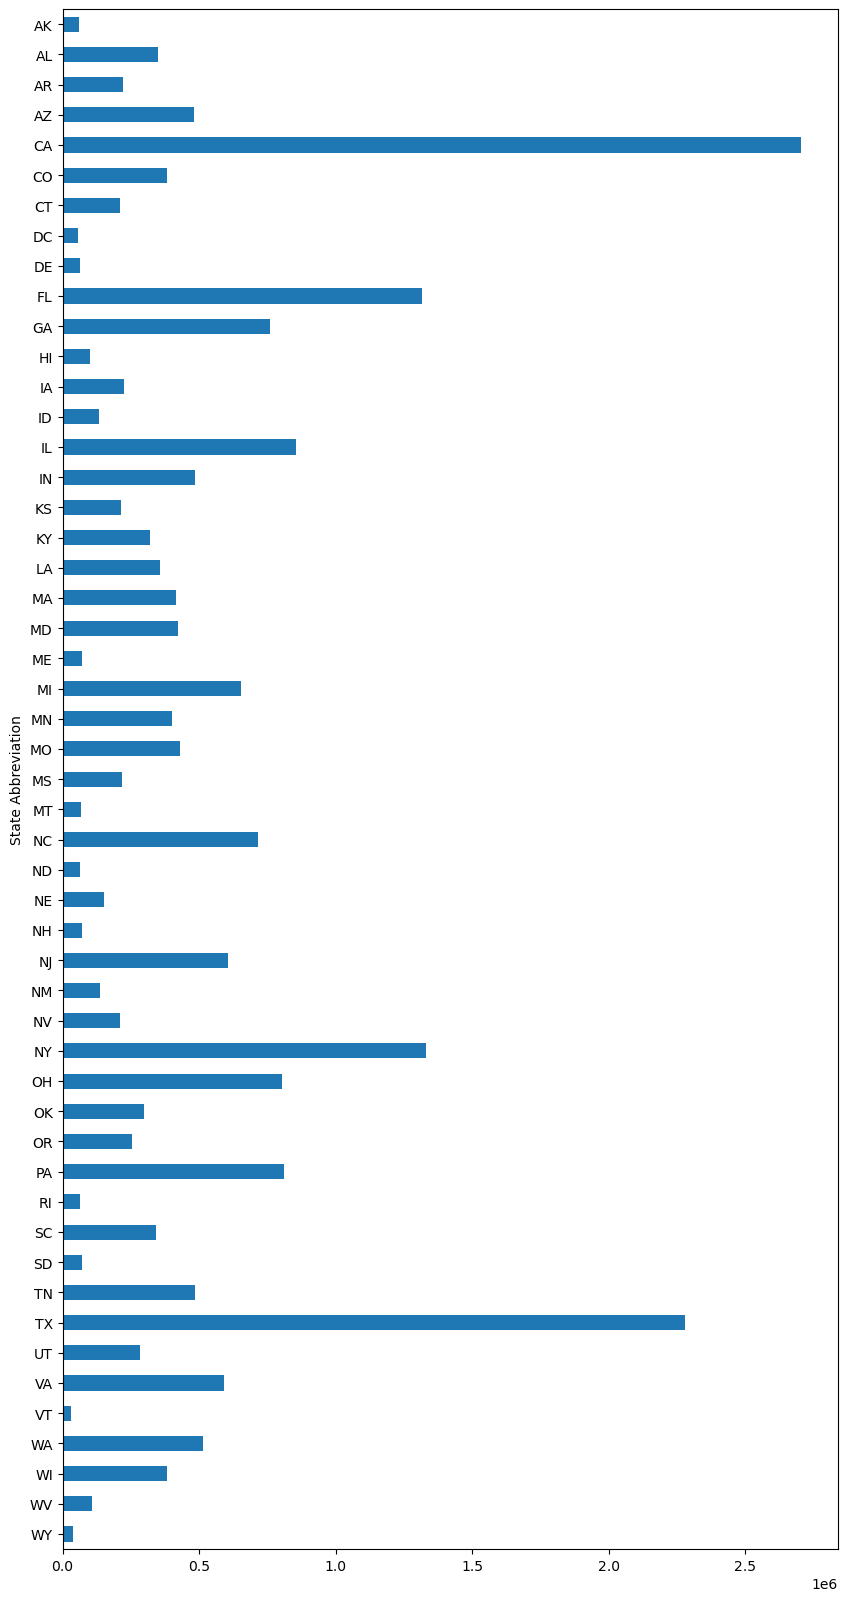

In [18]:
ax = total_births_per_state.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

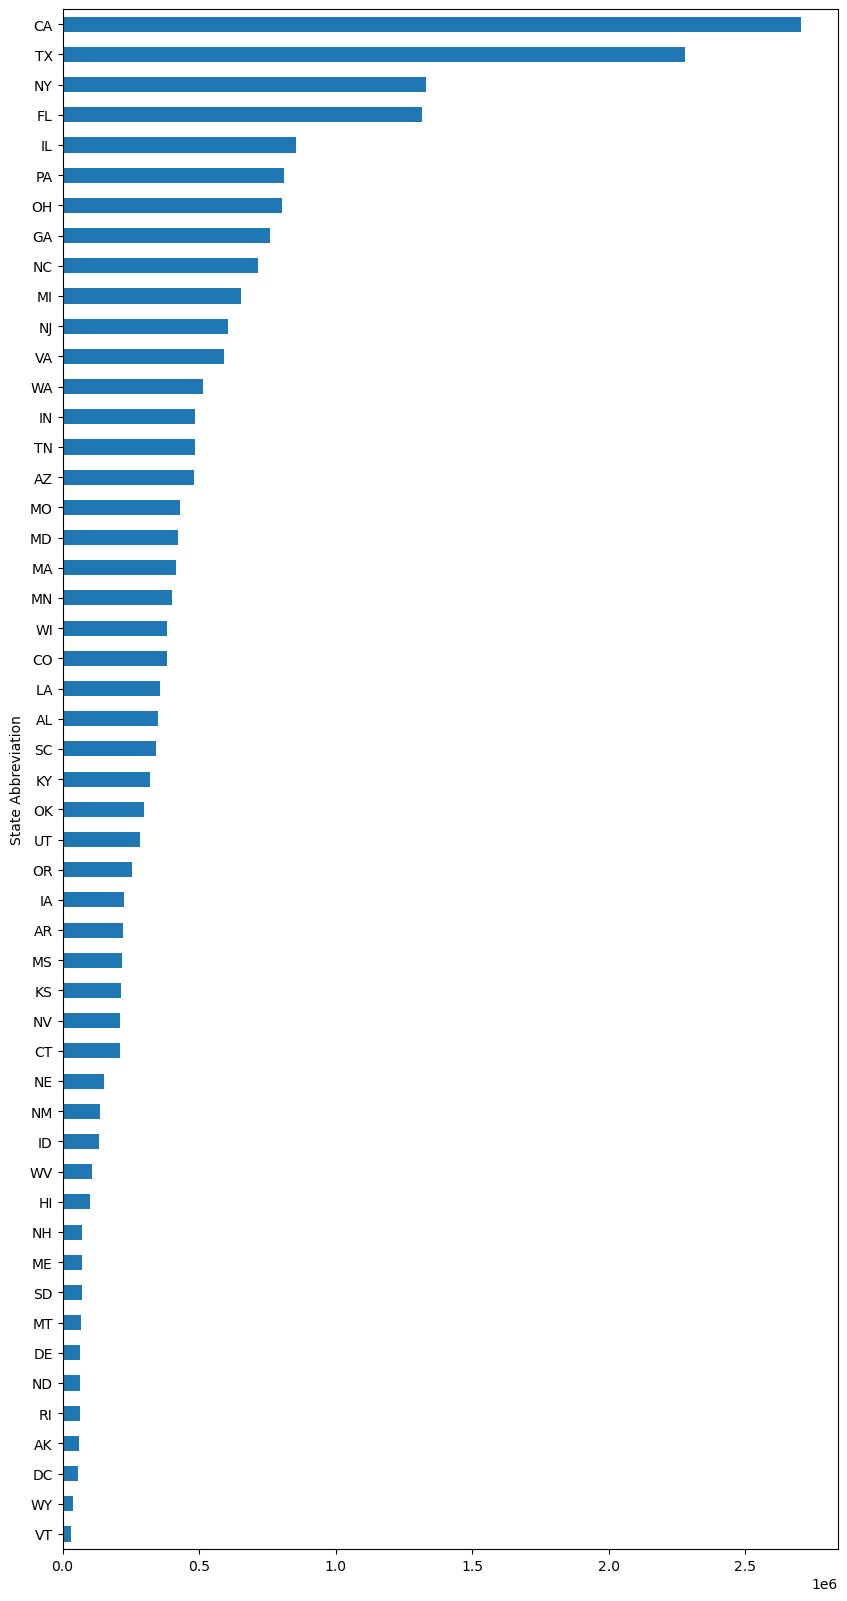

In [19]:
sorted_total_births_per_state = total_births_per_state.sort_values(ascending=False)
ax = sorted_total_births_per_state.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [20]:
total_births_by_gender = births.groupby('Gender')['Number of Births'].sum()
total_births_by_gender.head()

Gender
F    11050314
M    11568166
Name: Number of Births, dtype: int64

#### Total Births by Gender
In this small dataset, we can also use a regular bar plot for the visualization.

<Axes: xlabel='Gender'>

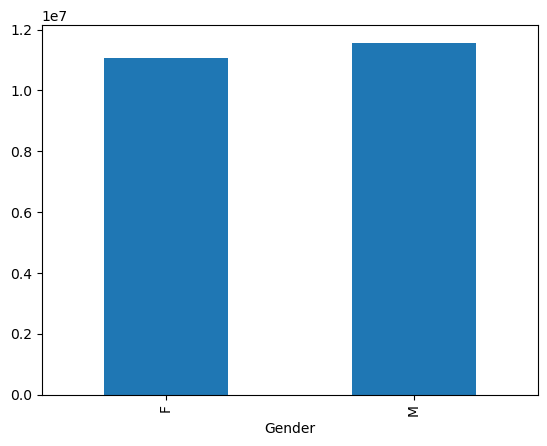

In [21]:
total_births_by_gender.plot(kind='bar', x='Gender', y='Number of Births')

Notice how the values are automatically converted to the scientific notation?

This is common in some libraries. However, this type of visualization is not descriptive and easy to understand for the audiences. We can apply an easy transformation for the values to make it easier to read.

Additionally, the ticklabels of the x-axis is automatically rotated. We can reverse that as well for better readability.

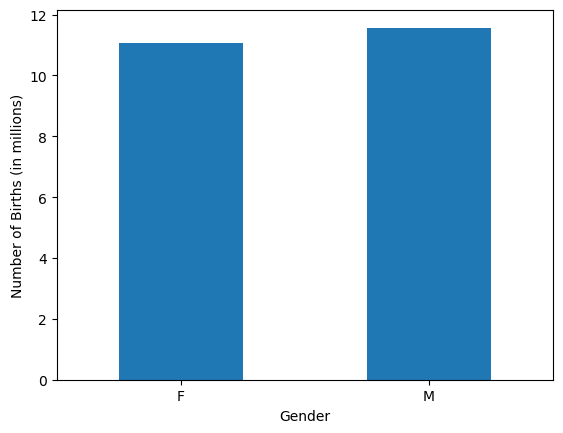

In [22]:
# divide the value by 1,000,000 (1 million)
total_births_in_millions = total_births_by_gender / 1000000

ax = total_births_in_millions.plot(kind='bar', x='Gender', y='Number of Births')
ax.set_ylabel('Number of Births (in millions)')
ax.set_xticklabels(['F', 'M'], rotation=0);

In [54]:
total_average_age_per_state_educ = births.groupby(['State Abbreviation', 'Education Level of Mother'])['Average Age of Mother (years)']

x = ['High school graduate or GED completed',
'Some college credit, but not a degree',
'Unknown or Not Stated',
'8th grade or less',
'9th through 12th grade with no diploma']

filtered_total_average_age_per_state_educ = total_average_age_per_state_educ[total_average_age_per_state_educ['State Abbreviation'].str.startswith('C')]
filtered_total_average_age_per_state_educ = filtered_total_average_age_per_state_educ[filtered_total_average_age_per_state_educ['Education Level of Mother'].isin(x)].reset_index(drop=True)
filtered_total_average_age_per_state_educ.head()

IndexError: Column(s) Average Age of Mother (years) already selected

In [24]:
total_births_per_state_educ['Education Level of Mother'].unique()

array(['8th grade or less', '9th through 12th grade with no diploma',
       'Associate degree (AA, AS)', "Bachelor's degree (BA, AB, BS)",
       'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)',
       'High school graduate or GED completed',
       "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
       'Some college credit, but not a degree', 'Unknown or Not Stated'],
      dtype=object)

In [25]:
set(total_births_per_state_educ['Education Level of Mother'])

{'8th grade or less',
 '9th through 12th grade with no diploma',
 'Associate degree (AA, AS)',
 "Bachelor's degree (BA, AB, BS)",
 'Doctorate (PhD, EdD) or Professional Degree (MD, DDS, DVM, LLB, JD)',
 'High school graduate or GED completed',
 "Master's degree (MA, MS, MEng, MEd, MSW, MBA)",
 'Some college credit, but not a degree',
 'Unknown or Not Stated'}

<Axes: >

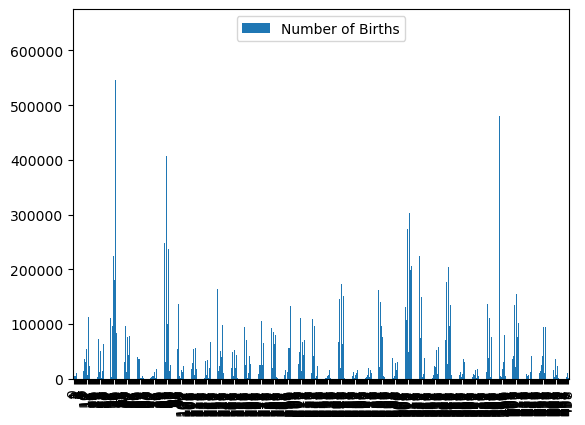

In [26]:
total_births_per_state_educ.plot(kind='bar', stacked=True)

#### Number of Births per state and education level

Since we have two keys and one value and the secondary key is actually a subcategory of the first key, we can create a stacked bar chart to see the part-to-whole relationship of the births based on the education level in each state.

In [44]:
educ_state_pivot = pd.pivot_table(data=filtered_total_average_age_per_state_educ, index='State Abbreviation',
                                  columns='Education Level of Mother', values='Average Age of Mother (years)')
educ_state_pivot.head()

Education Level of Mother,8th grade or less,9th through 12th grade with no diploma,High school graduate or GED completed,"Some college credit, but not a degree",Unknown or Not Stated
State Abbreviation,,,,,
CA,375.1,326.7,329.2,346.3,371.7
CO,364.7,304.2,317.7,338.4,356.4
CT,367.0,316.5,334.0,348.9,358.0


<Axes: xlabel='State Abbreviation'>

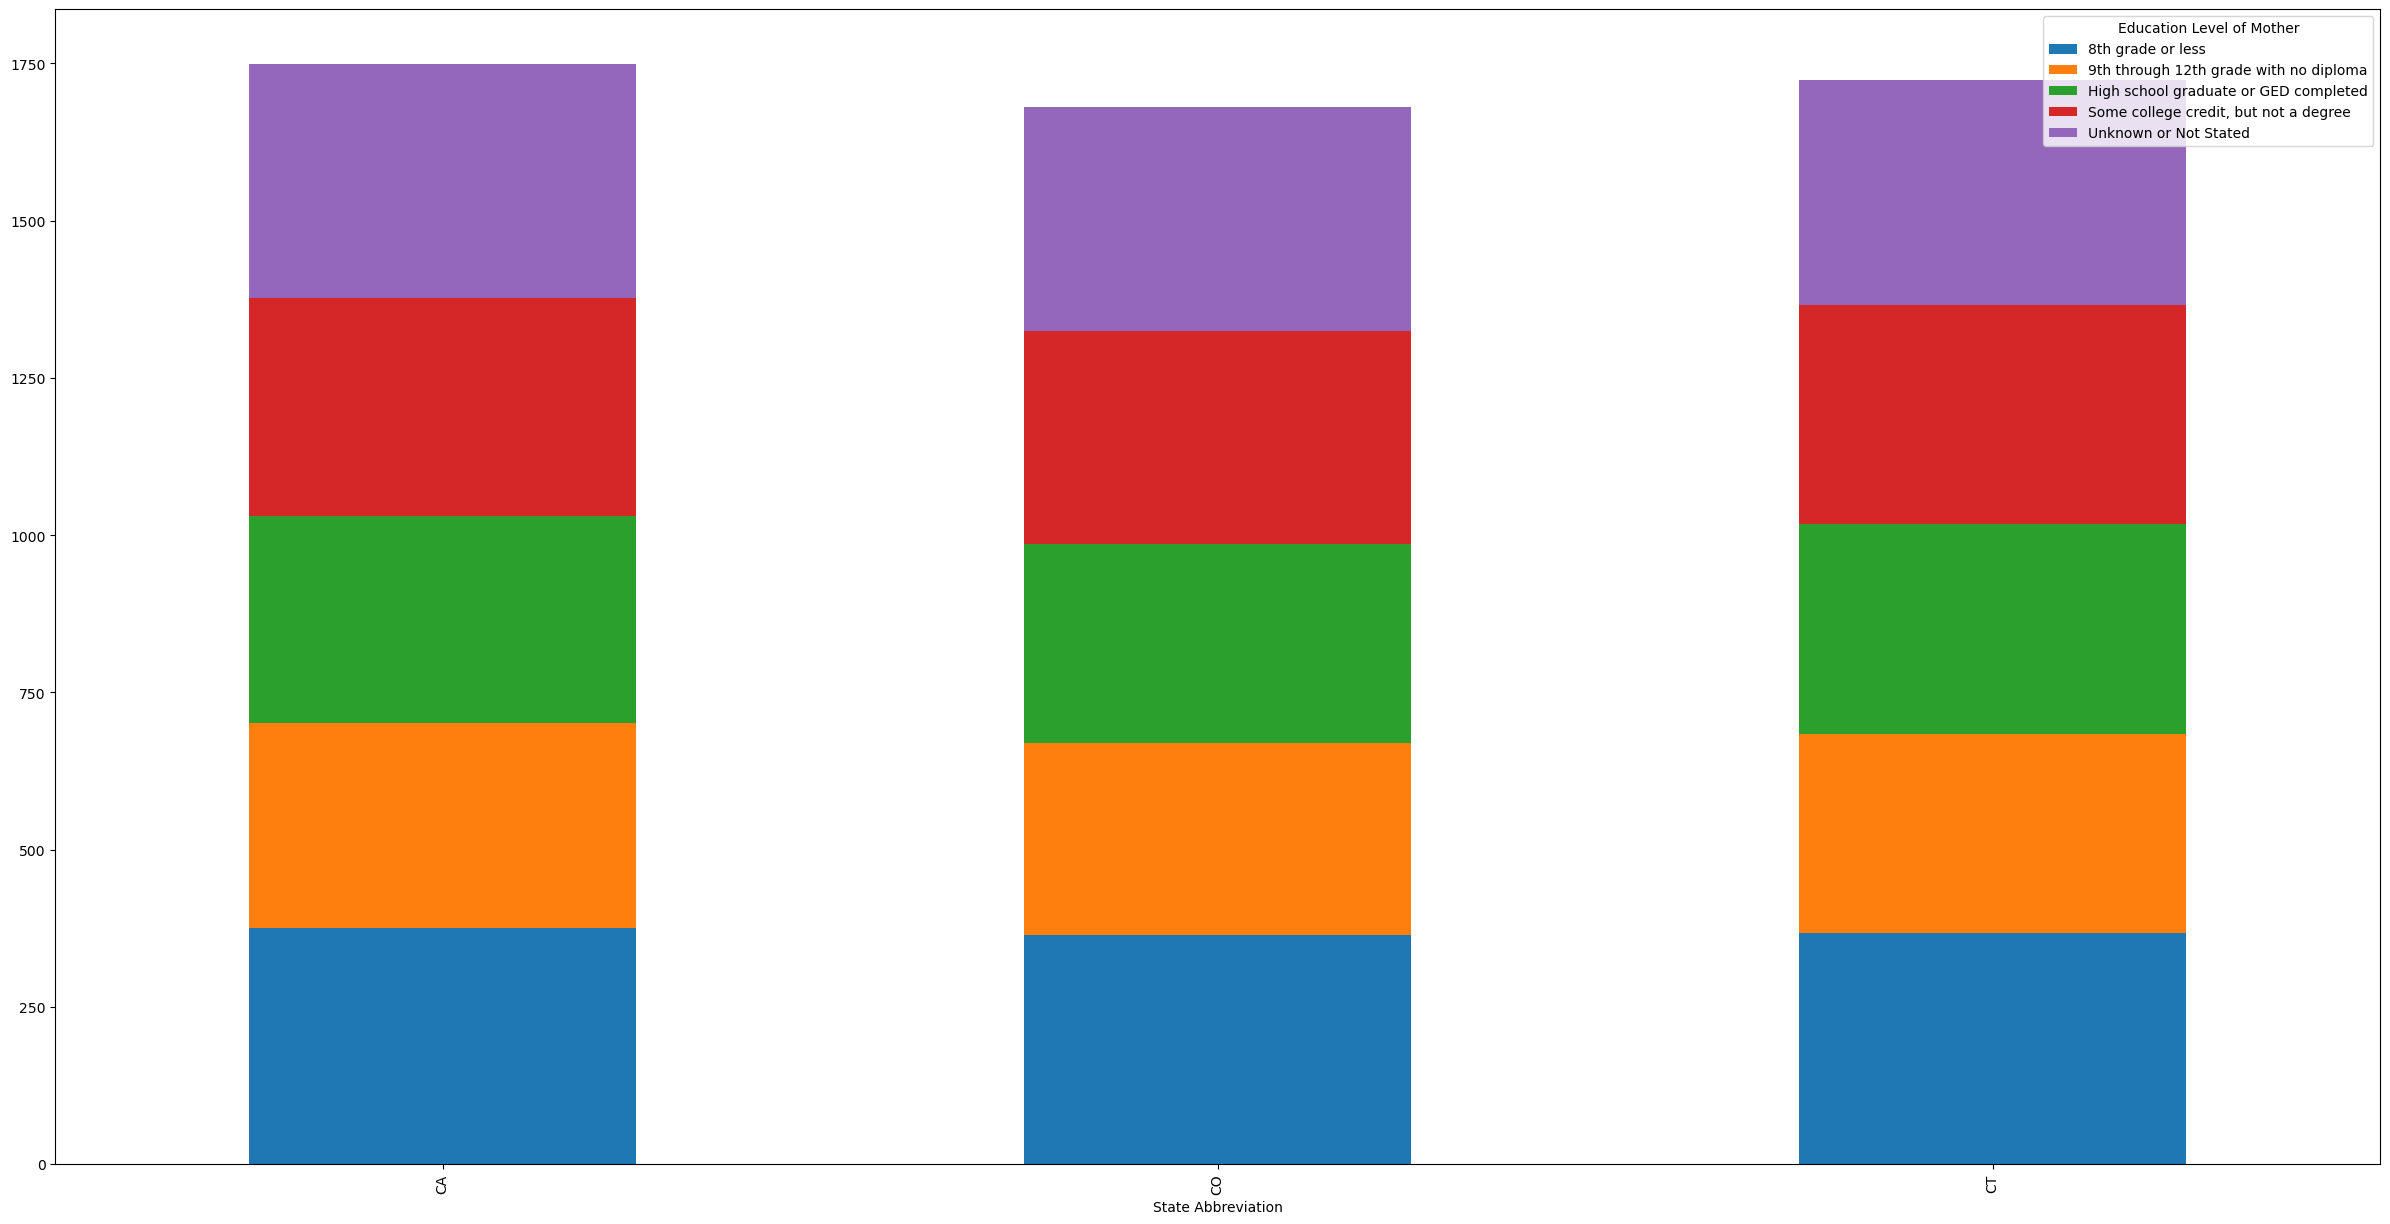

In [45]:
educ_state_pivot.plot.bar(stacked=True, figsize=(30, 15))

#### Annual Births

Since we have a time aspect in our dataset which is already aggregated to the year level, we can simply group by the year and get the total for the births.

In [55]:
annual_births = births.groupby('Year')['Number of Births'].sum()
annual_births

Year
2016    3945853
2017    3855479
2018    3791707
2019    3747531
2020    3613633
2021    3664277
Name: Number of Births, dtype: int64

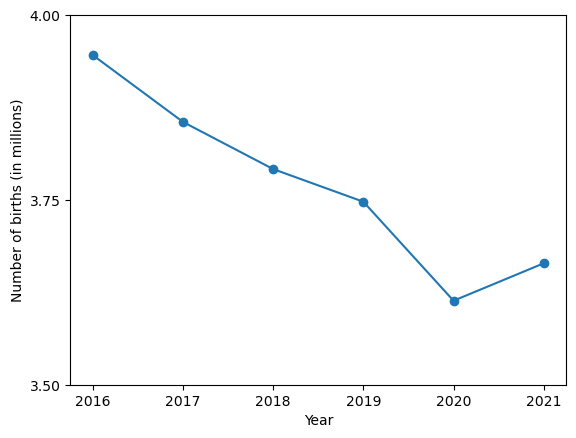

In [56]:
# fig = plt.figure(figsize=(12, 2))
ax = (annual_births / 1000000).plot(marker='o')
ax.set_ylabel('Number of births (in millions)')
ax.set_yticks(np.arange(3.5, 4.1, 0.25))
# ax.set_yticks(np.arange(0, 5, 1))

#### Time Series for multiple keys

We can also create multiple lines within a single chart to separate categories within the same time frame.

However, this can be problematic with multiple keys.

In [57]:
annual_births_by_state = births.groupby(['Year', 'State Abbreviation'])['Number of Births'].sum().reset_index()
annual_births_by_state.head()

,Year,State Abbreviation,Number of Births
0,2016,AK,11209
1,2016,AL,59151
2,2016,AR,38274
3,2016,AZ,84520
4,2016,CA,488827


In [58]:
births_time_pivot = pd.pivot_table(data=annual_births_by_state, index='Year', columns='State Abbreviation', values='Number of Births')
births_time_pivot.head()

State Abbreviation,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2016,11209.0,59151.0,38274.0,84520.0,488827.0,66613.0,36015.0,9858.0,10992.0,225022.0,...,12275.0,80807.0,398047.0,50464.0,102460.0,5756.0,90505.0,66615.0,19079.0,7386.0
2017,10445.0,58941.0,37520.0,81872.0,471658.0,64382.0,35221.0,9560.0,10855.0,223630.0,...,12134.0,81016.0,382050.0,48585.0,100391.0,5655.0,87562.0,64975.0,18675.0,6903.0
2018,10086.0,57761.0,37018.0,80723.0,454920.0,62885.0,34725.0,9212.0,10621.0,221542.0,...,11893.0,80751.0,378624.0,47209.0,99843.0,5432.0,86085.0,64098.0,18248.0,6562.0
2019,9822.0,58615.0,36564.0,79375.0,446479.0,62869.0,34258.0,9079.0,10562.0,220002.0,...,11449.0,80450.0,377599.0,46826.0,97429.0,5361.0,84895.0,63270.0,18136.0,6565.0
2020,9469.0,57647.0,35251.0,76947.0,420259.0,61494.0,33460.0,8874.0,10392.0,209671.0,...,10960.0,78689.0,368190.0,45702.0,94749.0,5133.0,83086.0,60594.0,17323.0,6128.0


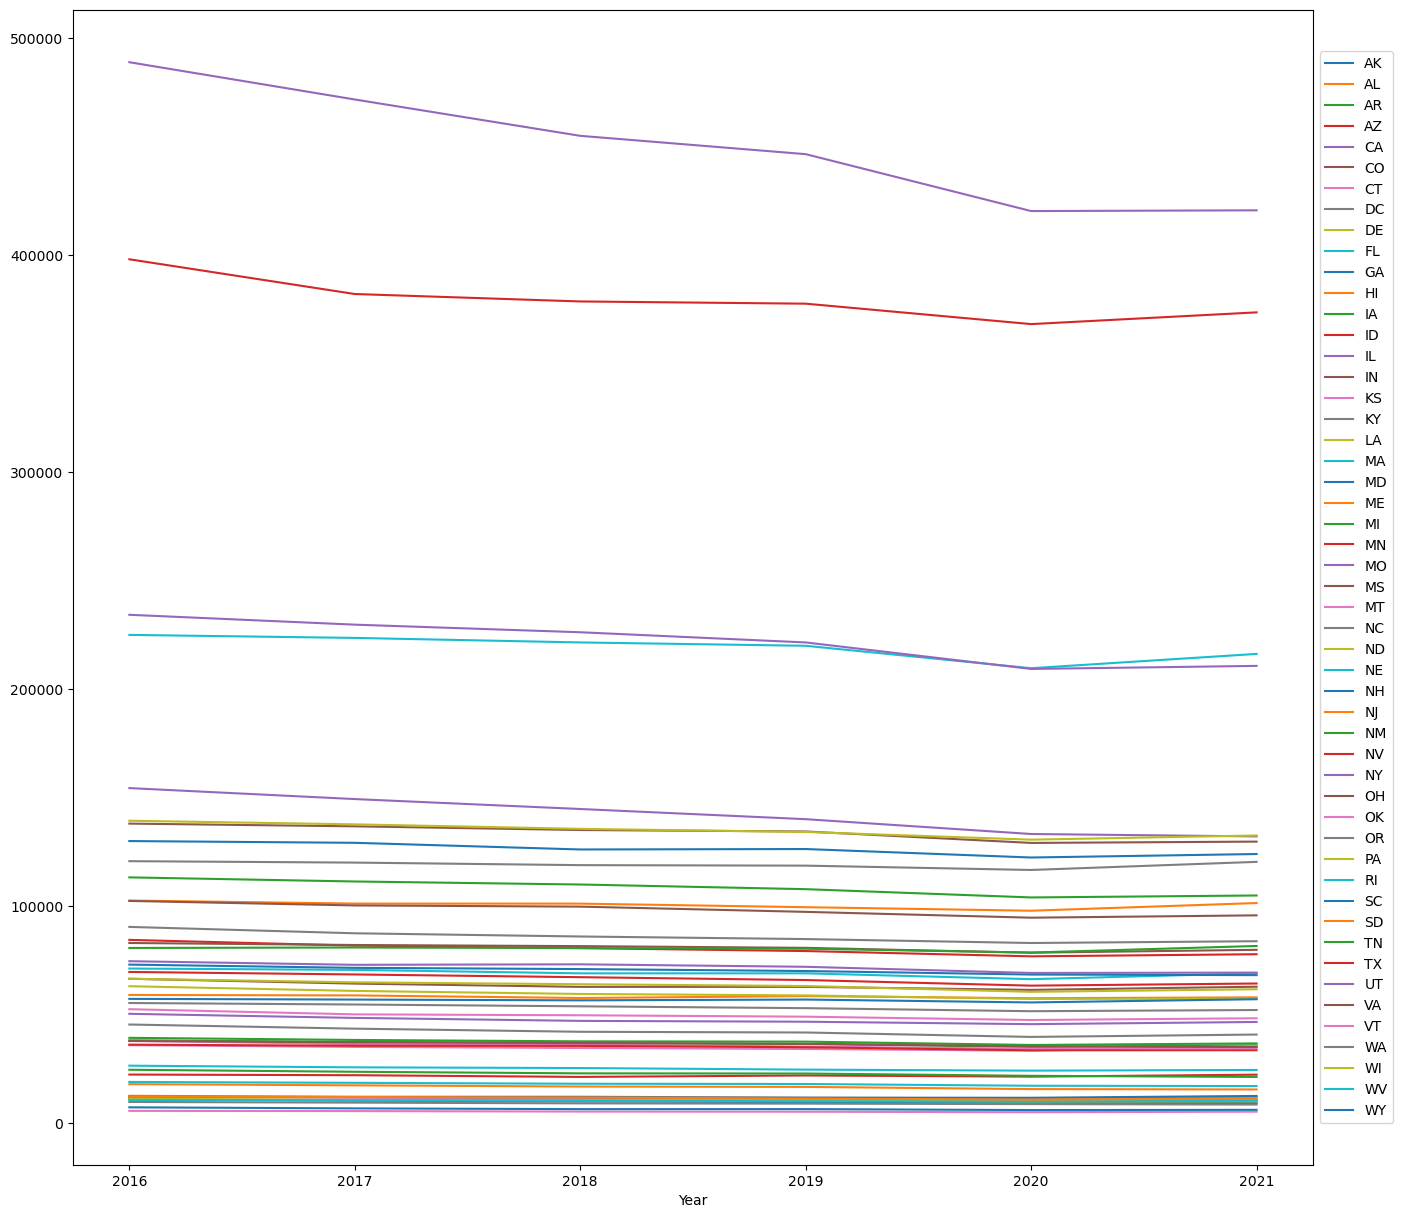

In [59]:
ax = births_time_pivot.plot(figsize=(20, 15))
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

As you can see above, this type of chart clashes with the discriminability rule for using colors. Additionally, the overlaps on all the lines will make it confusing for users.

An alternative for this would be to create a heatmap for the visualization to summarize the data.

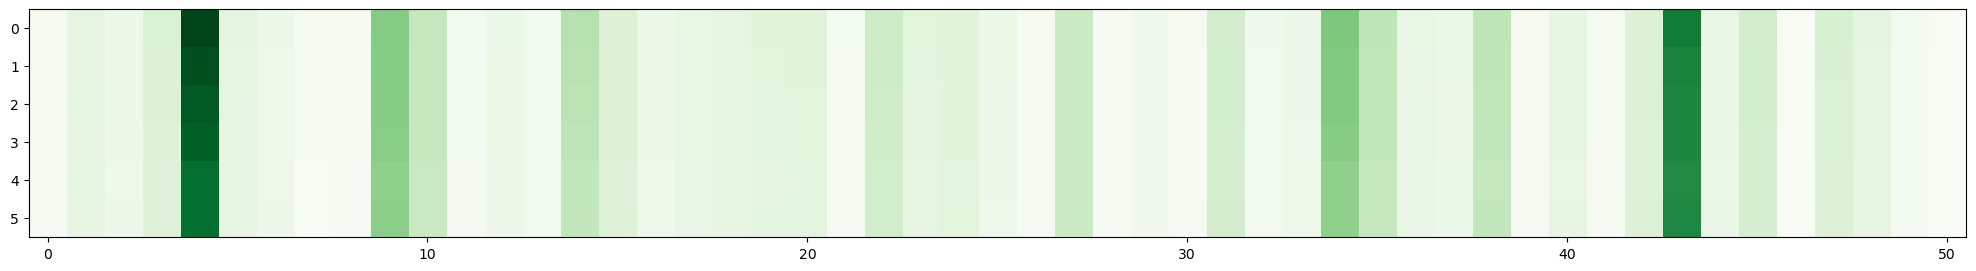

In [60]:
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111)
im = ax.imshow(births_time_pivot, cmap=plt.cm.Greens)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
[0 1 2 3 4 5]


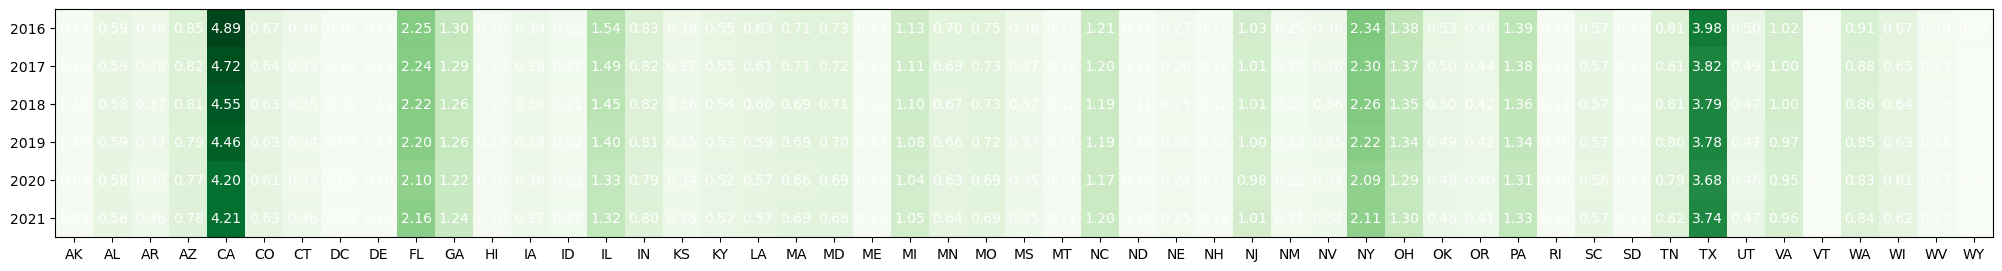

In [61]:
# Creates the figure or frame
fig = plt.figure(figsize=(25, 6))
# Adds the axis (Rows and Columns)
ax = fig.add_subplot(111)
# Uses the rows and columns to create heatmaps
im = ax.imshow(births_time_pivot, cmap=plt.cm.Greens)

states = births_time_pivot.columns
years = births_time_pivot.index

ax.set_xticks(np.arange(len(states)), labels=states)
print(np.arange(len(states)))
ax.set_yticks(np.arange(len(years)), labels=years)
print(np.arange(len(years)))
ax.grid(False)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(states)):
        text = ax.text(j, i, "{:.2f}".format(births_time_pivot.iloc[i, j]/100000),
                       ha="center", va="center", color="w")

## Convert to Plotly

For this course, you'll mostly be using Plotly Dash for the final project, let's convert all of the charts created to their counterpart in Plotly Python.

Most data won't need to be processed again. The same data processing is needed, only the function to create the chart is different.

#### Bar Charts

Reference: https://plotly.com/python/bar-charts/

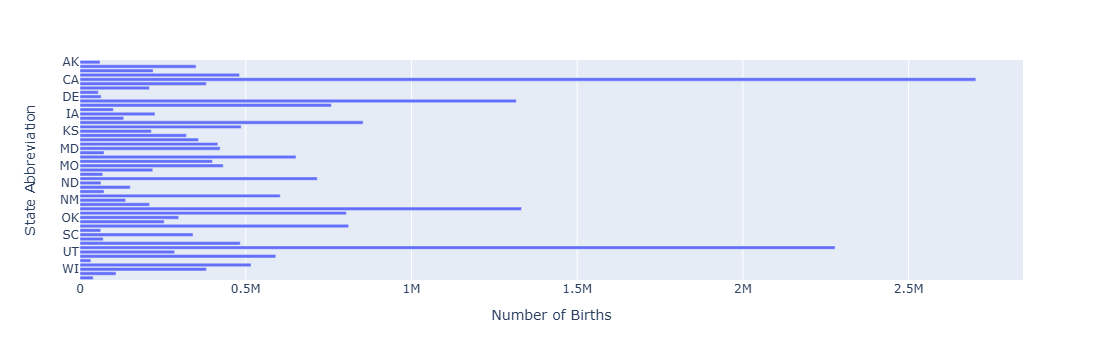

In [62]:
fig = px.bar(total_births_per_state.reset_index(), x='Number of Births', y='State Abbreviation')
fig.update_yaxes(autorange="reversed")
fig.show()

In [63]:
sorted_total_births_per_state.head()

State Abbreviation
CA    2702751
TX    2278104
NY    1331877
FL    1316127
IL     854265
Name: Number of Births, dtype: int64

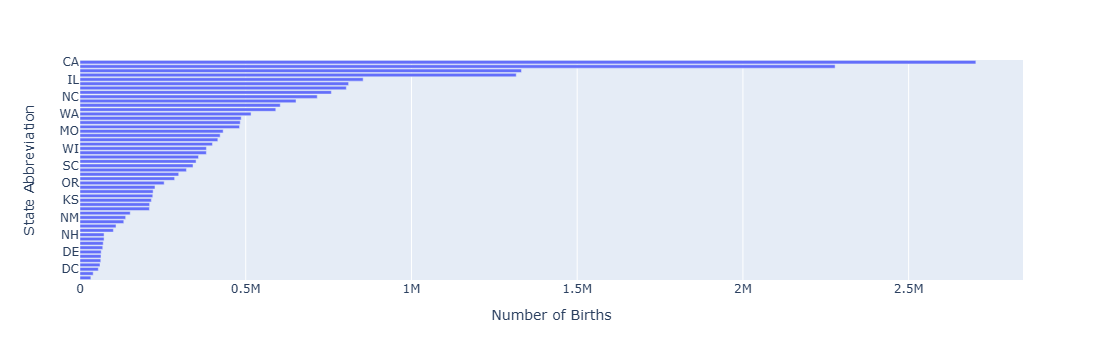

In [64]:
fig = px.bar(sorted_total_births_per_state, x='Number of Births', y=sorted_total_births_per_state.index)
fig.update_yaxes(autorange="reversed")
fig.show()

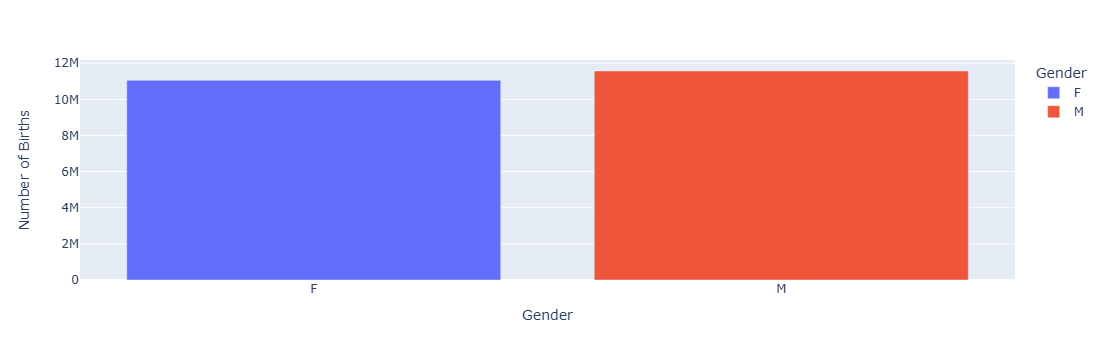

In [65]:
fig = px.bar(total_births_by_gender, y='Number of Births', x=total_births_by_gender.index, color=total_births_by_gender.index)
fig.show()

#### Stacked Bar Charts

Reference: https://plotly.com/python/bar-charts/#stacked-vs-grouped-bars

In [66]:
fig = px.bar(total_births_per_state_educ, x="State Abbreviation", y="Number of Births", color="Education Level of Mother")
fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['State Abbreviation', 'Education Level of Mother', 'Average Age of Mother (years)'] but received: Number of Births

When using the `pandas` built-in `matplotlib` integration, it requires converting your data into a matrix with the keys as the columns and index.

However, for `plotly`, you can simply keep the original aggregated table and use the columns as the `x` `y` and `color`.

#### Line Charts

Reference: https://plotly.com/python/line-charts/

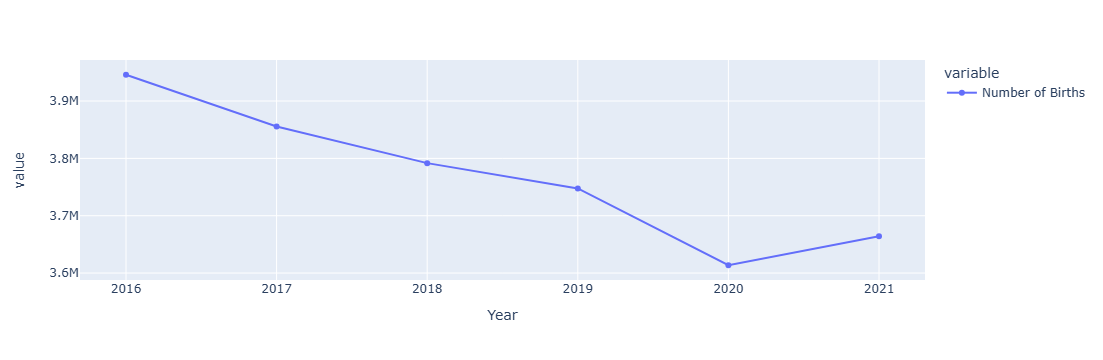

In [67]:
fig = px.line(annual_births, markers=True)
fig.show()

In [68]:
annual_births_reindex = annual_births.reset_index()
annual_births_reindex.head()

,Year,Number of Births
0,2016,3945853
1,2017,3855479
2,2018,3791707
3,2019,3747531
4,2020,3613633


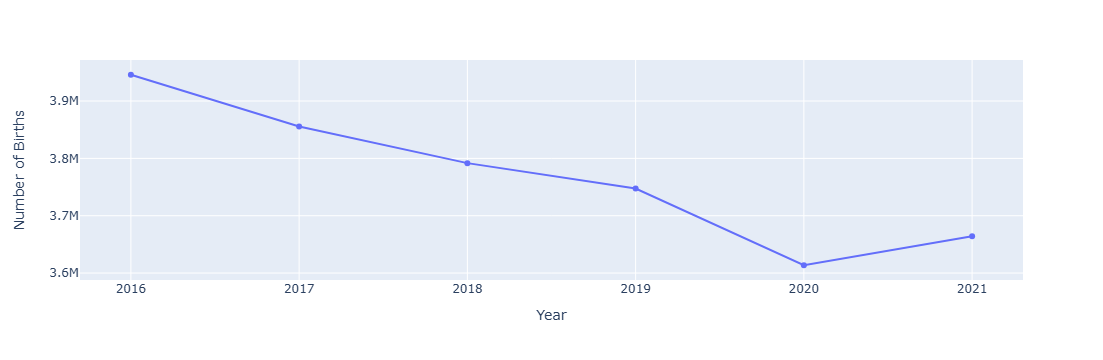

In [69]:
fig = px.line(annual_births_reindex, x='Year', y='Number of Births', markers=True)
fig.show()

Notice for `plotly`, it also automatically converts the numbers to the millions by appending the "M" after the decimal number.

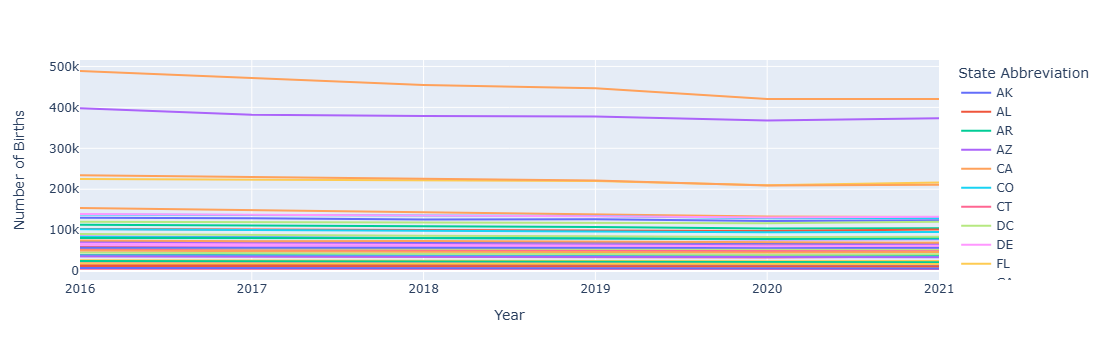

In [70]:
fig = px.line(annual_births_by_state, x="Year", y="Number of Births", color="State Abbreviation")
fig.show()

Similar to the stacked bar chart, for multiple series line graps, you don't need to turn your data into a pivot table. It's easier to use the pivot table for `pandas` but for `plotly`, you can simply separate it using the `color` argument which works as your secondary key.

#### Heatmap

Reference: https://plotly.com/python/heatmaps/

In [71]:
births_time_pivot

State Abbreviation,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2016,11209.0,59151.0,38274.0,84520.0,488827.0,66613.0,36015.0,9858.0,10992.0,225022.0,...,12275.0,80807.0,398047.0,50464.0,102460.0,5756.0,90505.0,66615.0,19079.0,7386.0
2017,10445.0,58941.0,37520.0,81872.0,471658.0,64382.0,35221.0,9560.0,10855.0,223630.0,...,12134.0,81016.0,382050.0,48585.0,100391.0,5655.0,87562.0,64975.0,18675.0,6903.0
2018,10086.0,57761.0,37018.0,80723.0,454920.0,62885.0,34725.0,9212.0,10621.0,221542.0,...,11893.0,80751.0,378624.0,47209.0,99843.0,5432.0,86085.0,64098.0,18248.0,6562.0
2019,9822.0,58615.0,36564.0,79375.0,446479.0,62869.0,34258.0,9079.0,10562.0,220002.0,...,11449.0,80450.0,377599.0,46826.0,97429.0,5361.0,84895.0,63270.0,18136.0,6565.0
2020,9469.0,57647.0,35251.0,76947.0,420259.0,61494.0,33460.0,8874.0,10392.0,209671.0,...,10960.0,78689.0,368190.0,45702.0,94749.0,5133.0,83086.0,60594.0,17323.0,6128.0
2021,9367.0,58054.0,35965.0,77916.0,420608.0,62949.0,35670.0,8660.0,10482.0,216260.0,...,11369.0,81717.0,373594.0,46712.0,95825.0,5384.0,83911.0,61781.0,17198.0,6237.0


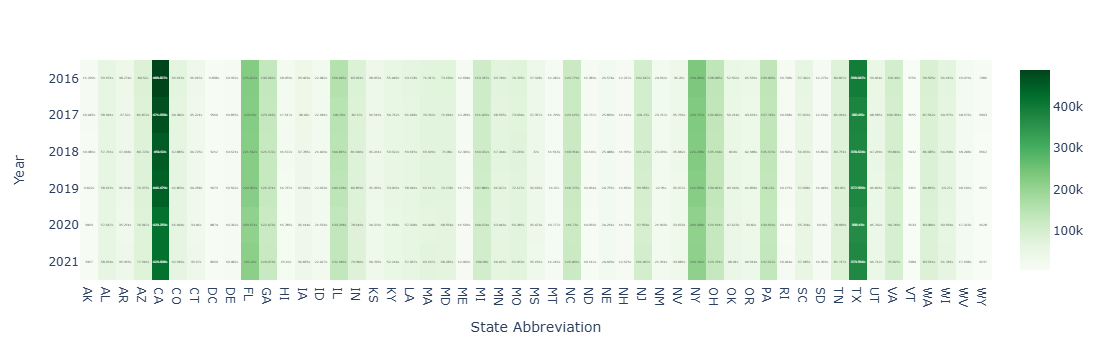

In [72]:
px.imshow(births_time_pivot, color_continuous_scale='Greens', text_auto=True, aspect="auto")

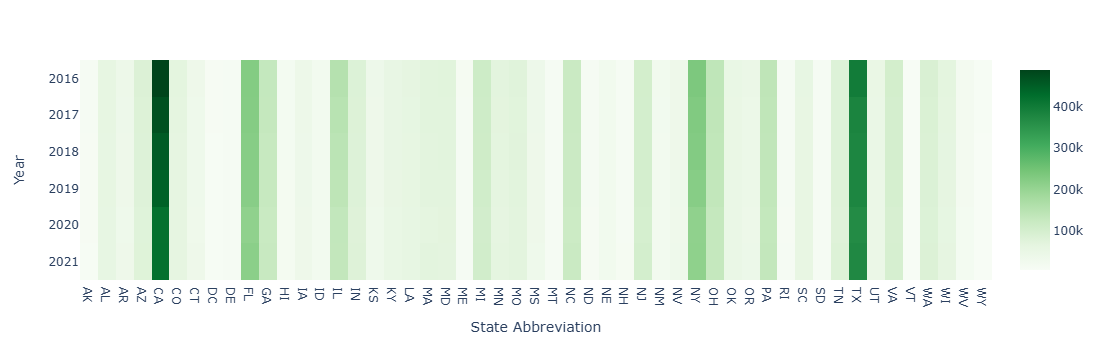

In [73]:
px.imshow(births_time_pivot, color_continuous_scale='Greens')

# Assignment

Try to create the following charts:
1. Convert the stacked bar chart of the births per state and per education level to a grouped bar chart in `plotly` (3 pts)

2. Convert the gender bar chart to a pie chart in `plotly` (2 pts)

3. **Challenge**: Create an appropriate chart to show the trend of the births per education level of the mother over the years in the US. (10 pts)
  * Show how you derived the data for the chart.